In [20]:
import copy
import matplotlib.patches as patches
import Metrica_Viz as mviz
import Metrica_IO as mio
import numpy as np
import pandas as pd
from cmap import Colormap
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans, KMeans, SpectralClustering
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

In [103]:
color_map = [
    "#FF0000",  # Red
    "#00FF00",  # Lime
    "#0000FF",  # Blue
    "#FFA500",  # Orange
    "#800080",  # Purple
    "#00FFFF",  # Cyan
    "#FF00FF",  # Magenta
    "#008000",  # Green
    "#FFC0CB",  # Pink
    "#8B4513",  # Saddle Brown
    "#FFD700",  # Gold
]

player_pos = ["P_1", "P_2", "P_3", "P_4", "P_5", "P_6", "P_7", "P_8", "P_9", "P_10", "P_11", "P_25", "P_15", "P_16", "P_17", "P_18", "P_19", "P_20", "P_21", "P_22", "P_23", "P_24"] # TODO: MIGHT BE FIX THIS LATER

In [179]:
df_home = pd.read_csv("Sample_Game_2_RawTrackingData_Home_Team.csv", low_memory=False)
df_away = pd.read_csv("Sample_Game_2_RawTrackingData_Away_Team.csv", low_memory=False)

In [180]:
ball_x = pd.to_numeric(df_home["Unnamed: 31"], errors='coerce')
ball_y = pd.to_numeric(df_home["Unnamed: 32"], errors='coerce')

In [181]:
df_home = df_home.iloc[2:].reset_index(drop=True)
last, bef_last = df_home.columns[-2:]
df_home.rename(columns={last: "ball-x", bef_last: "ball-y"}, inplace=True)
columns_to_drop = df_home.columns[(df_home.iloc[0].isna()) & (~df_home.columns.isin(["ball-x", "ball-y"]))]
df_home = df_home.drop(columns=columns_to_drop)
df_home.index = range(1, len(df_home) + 1)

In [182]:
df_home

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Home,Unnamed: 4,Home.1,Unnamed: 6,Home.2,Unnamed: 8,Home.3,...,Home.7,Unnamed: 18,Home.8,Unnamed: 20,Home.9,Unnamed: 22,Home.10,Unnamed: 24,ball-x,ball-y
1,1,1,0.04,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
2,1,2,0.08,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
3,1,3,0.12,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
4,1,4,0.16,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
5,1,5,0.2,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,141152,5646.08,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,NaN,NaN,0.28426,0.35845,NaN,NaN,0.06285,0.51243,NaN,NaN
141153,2,141153,5646.12,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,NaN,NaN,0.28365,0.35933,NaN,NaN,0.06285,0.51243,NaN,NaN
141154,2,141154,5646.16,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,NaN,NaN,0.28322,0.36067,NaN,NaN,0.06285,0.51243,NaN,NaN
141155,2,141155,5646.2,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,...,NaN,NaN,0.28266,0.36095,NaN,NaN,0.06285,0.51243,NaN,NaN


In [183]:
df_away = df_away.iloc[2:].reset_index(drop=True)
last, bef_last = df_away.columns[-2:]
df_away.rename(columns={last: "ball-x", bef_last: "ball-y"}, inplace=True)
columns_to_drop = df_away.columns[(df_away.iloc[0].isna()) & (~df_away.columns.isin(["ball-x", "ball-y"]))]
df_away = df_away.drop(columns=columns_to_drop)
df_away.index = range(1, len(df_away) + 1)

In [184]:
df_away

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Away,Unnamed: 4,Away.1,Unnamed: 6,Away.2,Unnamed: 8,Away.3,...,Away.7,Unnamed: 18,Away.8,Unnamed: 20,Away.9,Unnamed: 22,Away.10,Unnamed: 24,ball-x,ball-y
1,1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
2,1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
3,1,3,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
4,1,4,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
5,1,5,0.2,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,141152,5646.08,0.91211,0.48311,0.49028,-0.05000,0.48911,0.44788,0.59788,...,0.46751,1.05000,NaN,NaN,0.26855,0.61845,0.3676,0.12496,NaN,NaN
141153,2,141153,5646.12,0.91191,0.48311,0.49028,-0.05000,0.48894,0.44761,0.59767,...,0.4679,1.05000,NaN,NaN,0.26855,0.61845,0.3676,0.12496,NaN,NaN
141154,2,141154,5646.16,0.91168,0.48311,0.49028,-0.05000,0.48888,0.44684,0.59763,...,0.46818,1.05000,NaN,NaN,0.26855,0.61845,0.3676,0.12496,NaN,NaN
141155,2,141155,5646.2,0.91151,0.48311,0.49028,-0.05000,0.48895,0.44457,0.59775,...,0.46855,1.05000,NaN,NaN,0.26855,0.61845,0.3676,0.12496,NaN,NaN


In [185]:
def add_headers(data: pd.DataFrame, team: str, start: int, end: int) -> list[str]:
    headers = []
    
    if team == "Home":
        headers.extend([f"{team}-P_1-x", f"{team}-P_1-y"])
    
    for i in range(start, end):
        player_index = i - start + (1 if team == "Home" else 11)
        
        headers.append(f"{team}-{player_pos[player_index]}-x")
        headers.append(f"{team}-{player_pos[player_index]}-y")

    headers = ["Period", "Frame", "Time[s]"] + headers + ["ball-x", "ball-y"]
    return headers

df_home.columns = add_headers(df_home, "Home", 2, 12)
df_away.columns = add_headers(df_away, "Away", 12, 23)

In [186]:
df_home.head()

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Home-P_8-x,Home-P_8-y,Home-P_9-x,Home-P_9-y,Home-P_10-x,Home-P_10-y,Home-P_11-x,Home-P_11-y,ball-x,ball-y
1,1,1,0.04,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
2,1,2,0.08,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
3,1,3,0.12,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
4,1,4,0.16,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN
5,1,5,0.2,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,...,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,0.94275,0.50413,NaN,NaN


In [187]:
df_away.head()

,Period,Frame,Time[s],Away-P_25-x,Away-P_25-y,Away-P_15-x,Away-P_15-y,Away-P_16-x,Away-P_16-y,Away-P_17-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
2,1,2,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
3,1,3,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
4,1,4,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN
5,1,5,0.2,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,...,0.43313,0.31354,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN


## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [251]:
df_home['Period'] = pd.to_numeric(df_home['Period'], errors='coerce')
period_1_data_home = df_home[df_home["Period"] == 1]

In [252]:
df_away['Period'] = pd.to_numeric(df_away['Period'], errors='coerce')
period_1_data_away = df_away[df_away["Period"] == 1]

In [254]:
# Dropping the rows where the ball's x-y coordinates are NaN
period_1_data_home = period_1_data_home.dropna(subset=["ball-x", "ball-y"], how="any")
period_1_data_away = period_1_data_away.dropna(subset=["ball-x", "ball-y"], how="any")

In [255]:
period_1_data_home

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Home-P_8-x,Home-P_8-y,Home-P_9-x,Home-P_9-y,Home-P_10-x,Home-P_10-y,Home-P_11-x,Home-P_11-y,ball-x,ball-y
51,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.53316,0.78648,0.5014,0.35295,0.50046,0.65322,0.94791,0.48986,0.50216,0.50376
52,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.53323,0.78651,0.50128,0.35261,0.50036,0.65297,0.94779,0.49005,0.5004,0.50384
53,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.53328,0.78657,0.50115,0.35226,0.50025,0.65270,0.94766,0.49025,0.4977,0.50397
54,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.53334,0.78658,0.50102,0.35198,0.50011,0.65247,0.94756,0.49039,0.495,0.50410
55,1,55,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,...,0.53341,0.78658,0.50088,0.35169,0.49994,0.65213,0.94746,0.49049,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.50464,0.58939,0.52868,0.71467,0.55447,0.80078,0.51242,...,0.38271,0.44293,0.32281,0.54837,0.31453,0.73709,0.90287,0.64323,0.00161,0.50354
67854,1,67854,2714.16,0.50473,0.59095,0.52857,0.71567,0.55441,0.80154,0.51242,...,0.38291,0.44371,0.32315,0.54893,0.3148,0.73775,0.90178,0.64435,0.00341,0.49632
67855,1,67855,2714.2,0.50482,0.59251,0.52846,0.71667,0.55435,0.80230,0.51242,...,0.38309,0.44450,0.32349,0.54951,0.31508,0.73845,0.9007,0.64545,0.00522,0.48911
67856,1,67856,2714.24,0.50492,0.59407,0.52836,0.71766,0.55428,0.80303,0.51242,...,0.3833,0.44529,0.32385,0.55009,0.31537,0.73920,0.89961,0.64660,0.00702,0.48190


In [256]:
period_1_data_away

,Period,Frame,Time[s],Away-P_25-x,Away-P_25-y,Away-P_15-x,Away-P_15-y,Away-P_16-x,Away-P_16-y,Away-P_17-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,51,2.04,0.00315,0.50293,0.38528,0.82061,0.3085,0.56600,0.31453,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,52,2.08,0.00315,0.50293,0.38535,0.82071,0.30849,0.56598,0.31434,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.4958,0.36160,0.5004,0.50384
53,1,53,2.12,0.00315,0.50293,0.38542,0.82083,0.30846,0.56595,0.31415,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.4977,0.50397
54,1,54,2.16,0.00315,0.50293,0.3855,0.82093,0.30845,0.56595,0.31398,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.495,0.50410
55,1,55,2.2,0.00314,0.50291,0.38559,0.82100,0.30844,0.56595,0.31381,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.00095,0.50644,0.40104,0.91503,0.31453,0.73709,0.30318,...,0.42682,0.56888,0.36177,0.37021,0.53603,0.86863,0.46103,0.54963,0.00161,0.50354
67854,1,67854,2714.16,0.00099,0.50669,0.40104,0.91503,0.3148,0.73775,0.30344,...,0.42686,0.56960,0.36142,0.37082,0.53588,0.86944,0.46106,0.55049,0.00341,0.49632
67855,1,67855,2714.2,0.00106,0.50698,0.40104,0.91503,0.31508,0.73845,0.3037,...,0.42689,0.57027,0.36106,0.37152,0.53572,0.87025,0.4611,0.55129,0.00522,0.48911
67856,1,67856,2714.24,0.00114,0.50727,0.40104,0.91503,0.31537,0.73920,0.30397,...,0.42693,0.57099,0.36071,0.37223,0.53556,0.87106,0.46114,0.55210,0.00702,0.48190


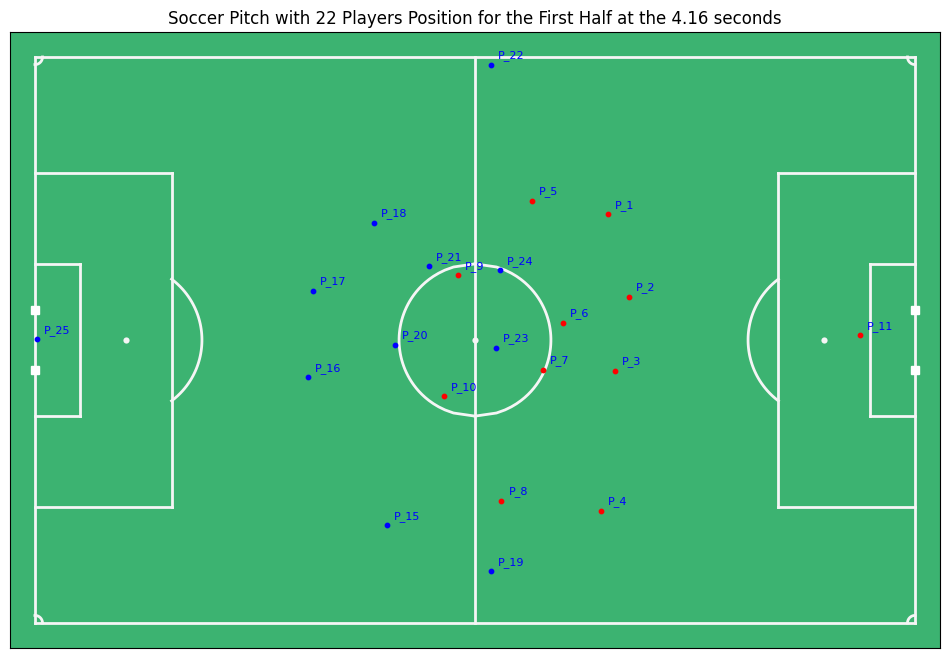

In [257]:
fig, ax = mviz.plot_pitch()

# Prepare player positions and their coordinates on the pitch
home_frame = period_1_data_home.iloc[53]
away_frame = period_1_data_away.iloc[53]
pos_x = [[float(home_frame.iloc[i]), period_1_data_home.columns[i]] for i in range(3, period_1_data_home.shape[1] - 2) if "-x" in period_1_data_home.columns[i]]
pos_y = [[float(home_frame.iloc[i]), period_1_data_home.columns[i]] for i in range(3, period_1_data_home.shape[1] - 2) if "-y" in period_1_data_home.columns[i]]
pos_x = pos_x + [[float(away_frame.iloc[i]), period_1_data_away.columns[i]] for i in range(3, period_1_data_away.shape[1]) if "-x" in period_1_data_away.columns[i]]
pos_y = pos_y + [[float(away_frame.iloc[i]), period_1_data_away.columns[i]] for i in range(3, period_1_data_away.shape[1]) if "-y" in period_1_data_away.columns[i]]

data_x, col_x = [item[0] for item in pos_x], [item[1] for item in pos_x]
data_y, col_y = [item[0] for item in pos_y], [item[1] for item in pos_y]

positions_x = pd.DataFrame([data_x], columns=col_x)
positions_y = pd.DataFrame([data_y], columns=col_y)

# Changing the dataset to meter or pitch coordinates
positions_x = mio.to_metric_coordinates(positions_x)
positions_y = mio.to_metric_coordinates(positions_y)

MEAN_X_POS = positions_x.mean(axis=1)[0]
DIRECTION_TO_GOAL = "<--" if MEAN_X_POS > 0 else "-->"
DIRECTION_TO_GOAL += " Direction To Goal"

# Annotate player names
for i, (x, y, name) in enumerate(zip(positions_x.iloc[0], positions_y.iloc[0], player_pos)):
    color = "red"
    if i > 10:
        color = "blue"
    ax.scatter(x, y, color=color, s=10, zorder=2)  # Plot red dot
    ax.annotate(name, (x, y), xytext=(5, 5), textcoords="offset points", fontsize=8, color='blue')
# ax.annotate(DIRECTION_TO_GOAL, (MEAN_X_POS, 29.55), xytext=(MEAN_X_POS, 29.55), textcoords="offset points", fontsize=18, color="red")

seconds = home_frame.iloc[2]
plt.title(f"Soccer Pitch with 22 Players Position for the First Half at the {seconds} seconds")
plt.show()

In [258]:
period_1_data_home

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Home-P_8-x,Home-P_8-y,Home-P_9-x,Home-P_9-y,Home-P_10-x,Home-P_10-y,Home-P_11-x,Home-P_11-y,ball-x,ball-y
51,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.53316,0.78648,0.5014,0.35295,0.50046,0.65322,0.94791,0.48986,0.50216,0.50376
52,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.53323,0.78651,0.50128,0.35261,0.50036,0.65297,0.94779,0.49005,0.5004,0.50384
53,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.53328,0.78657,0.50115,0.35226,0.50025,0.65270,0.94766,0.49025,0.4977,0.50397
54,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.53334,0.78658,0.50102,0.35198,0.50011,0.65247,0.94756,0.49039,0.495,0.50410
55,1,55,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,...,0.53341,0.78658,0.50088,0.35169,0.49994,0.65213,0.94746,0.49049,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.50464,0.58939,0.52868,0.71467,0.55447,0.80078,0.51242,...,0.38271,0.44293,0.32281,0.54837,0.31453,0.73709,0.90287,0.64323,0.00161,0.50354
67854,1,67854,2714.16,0.50473,0.59095,0.52857,0.71567,0.55441,0.80154,0.51242,...,0.38291,0.44371,0.32315,0.54893,0.3148,0.73775,0.90178,0.64435,0.00341,0.49632
67855,1,67855,2714.2,0.50482,0.59251,0.52846,0.71667,0.55435,0.80230,0.51242,...,0.38309,0.44450,0.32349,0.54951,0.31508,0.73845,0.9007,0.64545,0.00522,0.48911
67856,1,67856,2714.24,0.50492,0.59407,0.52836,0.71766,0.55428,0.80303,0.51242,...,0.3833,0.44529,0.32385,0.55009,0.31537,0.73920,0.89961,0.64660,0.00702,0.48190


In [259]:
period_1_data_away

,Period,Frame,Time[s],Away-P_25-x,Away-P_25-y,Away-P_15-x,Away-P_15-y,Away-P_16-x,Away-P_16-y,Away-P_17-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,51,2.04,0.00315,0.50293,0.38528,0.82061,0.3085,0.56600,0.31453,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,52,2.08,0.00315,0.50293,0.38535,0.82071,0.30849,0.56598,0.31434,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.4958,0.36160,0.5004,0.50384
53,1,53,2.12,0.00315,0.50293,0.38542,0.82083,0.30846,0.56595,0.31415,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.4977,0.50397
54,1,54,2.16,0.00315,0.50293,0.3855,0.82093,0.30845,0.56595,0.31398,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.495,0.50410
55,1,55,2.2,0.00314,0.50291,0.38559,0.82100,0.30844,0.56595,0.31381,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.00095,0.50644,0.40104,0.91503,0.31453,0.73709,0.30318,...,0.42682,0.56888,0.36177,0.37021,0.53603,0.86863,0.46103,0.54963,0.00161,0.50354
67854,1,67854,2714.16,0.00099,0.50669,0.40104,0.91503,0.3148,0.73775,0.30344,...,0.42686,0.56960,0.36142,0.37082,0.53588,0.86944,0.46106,0.55049,0.00341,0.49632
67855,1,67855,2714.2,0.00106,0.50698,0.40104,0.91503,0.31508,0.73845,0.3037,...,0.42689,0.57027,0.36106,0.37152,0.53572,0.87025,0.4611,0.55129,0.00522,0.48911
67856,1,67856,2714.24,0.00114,0.50727,0.40104,0.91503,0.31537,0.73920,0.30397,...,0.42693,0.57099,0.36071,0.37223,0.53556,0.87106,0.46114,0.55210,0.00702,0.48190


## Tracking for individual Players for the First Period

In [260]:
period_1_data = pd.concat([period_1_data_home.iloc[:40000, :-2],  period_1_data_away.iloc[:40000, 3:]], axis=1)

In [261]:
period_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.4958,0.36160,0.5004,0.50384
53,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.4977,0.50397
54,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.495,0.50410
55,1,55,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56941,1,56941,2277.64,0.62761,0.23085,0.6423,0.40400,0.64701,0.57348,0.65522,...,0.524,0.38176,0.59599,0.15547,0.606,0.74054,0.61124,0.28576,0.06203,0.42215
56942,1,56942,2277.68,0.62798,0.23092,0.64336,0.40412,0.64762,0.57316,0.65551,...,0.52415,0.38200,0.59609,0.15545,0.60593,0.73984,0.61163,0.28605,0.06193,0.42138
56943,1,56943,2277.72,0.62836,0.23102,0.64441,0.40427,0.64823,0.57281,0.65579,...,0.52428,0.38227,0.59617,0.15548,0.60585,0.73912,0.61202,0.28637,0.06181,0.42066
56944,1,56944,2277.76,0.62875,0.23123,0.64546,0.40446,0.64886,0.57245,0.65606,...,0.52441,0.38258,0.59625,0.15554,0.60576,0.73846,0.61241,0.28659,0.06169,0.42000


In [262]:
def player_tracking(dataset: pd.DataFrame, players: list[int] = [11], plot_ball: bool =True, use_annotation: bool = False, sides: list[str] = None, markersize: int = 7):
    fig, ax = mviz.plot_pitch()
    ball_is_not_there = plot_ball
    title = "Player, and Side at each intervals"
    if use_annotation:
        title = "Player, and Frame at each intervals"
    
    for i, (player, side) in enumerate(zip(players, sides)):
        x = f"{side}-P_{player}-x"
        y = f"{side}-P_{player}-y"
    
        # Prepare player positions and their coordinates on the pitch
        data_x = pd.to_numeric(dataset[x], errors='coerce')
        data_y = pd.to_numeric(dataset[y], errors='coerce')
        
        # Create DataFrames with a single column for x and y coordinate of a player
        positions_x = pd.DataFrame(data_x, columns=[x])
        positions_y = pd.DataFrame(data_y, columns=[y])
        
        # Changing the dataset to metric or pitch coordinates
        positions_x = mio.to_metric_coordinates(positions_x)
        positions_y = mio.to_metric_coordinates(positions_y)

        color = color_map[i % len(color_map)]
        
        # Plot player movement with arrows
        for j in range(len(positions_x) - 1):
            dx = positions_x[x].iloc[j+1] - positions_x[x].iloc[j]
            dy = positions_y[y].iloc[j+1] - positions_y[y].iloc[j]
            if abs(dx) > 0.1 or abs(dy) > 0.1:  # Only draw arrows for significant movements
                ax.arrow(positions_x[x].iloc[j], positions_y[y].iloc[j], dx, dy, head_width=1.2, head_length=1.2, fc=color, ec=color, linestyle="dotted", length_includes_head=True)

        # Plot the player path with dots and lines
        if use_annotation:
            for i in range(len(positions_x)):
                ax.plot(positions_x[x].iloc[i], positions_y[y].iloc[i], marker=".", linestyle="-.", markersize=markersize, color=color, zorder=3, label=f"P{use_annotation[i]} - {positions_x.index[i]}")
                ax.text(positions_x[x].iloc[i], positions_y[y].iloc[i], positions_x.index[i], fontsize=12, ha='right')
        else:
            ax.plot(positions_x[x], positions_y[y], marker=".", linestyle="-.", markersize=markersize, color=color, zorder=3, label=f"Player {player} - {side}")
        ax.plot(positions_x[x].iloc[0], positions_y[y].iloc[0], marker=".", linestyle="-.", markersize=int(markersize * 1.75), color="green", zorder=3)
        ax.plot(positions_x[x].iloc[-1], positions_y[y].iloc[-1], marker=".", linestyle="-.", markersize=int(markersize * 1.75), color="red", zorder=3)
                    
        # ax.annotate("Start Point", (positions_x[x].iloc[0], positions_y[y].iloc[0]), xytext=(5, 5), textcoords="offset points", fontsize=8, color=color)
        # ax.annotate("End Point", (positions_x[x].iloc[-1], positions_y[y].iloc[-1]), xytext=(5, 5), textcoords="offset points", fontsize=8, color=color)

    if ball_is_not_there:
        ba_x = pd.to_numeric(dataset["ball-x"], errors='coerce')
        ba_y = pd.to_numeric(dataset["ball-y"], errors='coerce')
        
        ba_x = mio.to_metric_coordinates(pd.DataFrame(ba_x, columns=["ball-x"]))
        ba_y = mio.to_metric_coordinates(pd.DataFrame(ba_y, columns=["ball-y"]))
        
        ax.plot(ba_x["ball-x"], ba_y["ball-y"], marker=".", linestyle="-.", markersize=int(markersize * 1.5), color="black", zorder=2, label="Ball")
        ax.plot(ba_x["ball-x"].iloc[0], ba_y["ball-y"].iloc[0], marker=".", linestyle="-.", markersize=int(markersize * 1.75), color="green", zorder=2)
        ax.plot(ba_x["ball-x"].iloc[-1], ba_y["ball-y"].iloc[-1], marker=".", linestyle="-.", markersize=int(markersize * 1.75), color="red", zorder=2)
        
        # Ball movement arrows
        for j in range(len(ba_x) - 1):
            dx = ba_x["ball-x"].iloc[j+1] - ba_x["ball-x"].iloc[j]
            dy = ba_y["ball-y"].iloc[j+1] - ba_y["ball-y"].iloc[j]
            if abs(dx) > 0.1 or abs(dy) > 0.1:  # Only draw arrows for significant movements
                ax.arrow(ba_x["ball-x"].iloc[j], ba_y["ball-y"].iloc[j], dx, dy, head_width=1.2, head_length=1.2, fc='black', ec='black', linestyle="dotted", length_includes_head=True)
                
        # ax.annotate("Start Point", (ba_x["ball-x"].iloc[0], ba_y["ball-y"].iloc[0]), xytext=(5, 5), textcoords="offset points", fontsize=8, color="black")
        # ax.annotate("End Point", (ba_x["ball-x"].iloc[-1], ba_y["ball-y"].iloc[-1]), xytext=(5, 5), textcoords="offset points", fontsize=8, color="black")
        
    ball_is_not_there = False
    
    start_seconds = dataset["Time[s]"].iloc[0]
    end_seconds = dataset["Time[s]"].iloc[-1]
    pl = [i for i in players]
    ax.set_title(f"Tracking for Player {pl} in the First Half from {start_seconds} seconds to {end_seconds} seconds")
    ax.legend(title=title, loc="upper left", fontsize=8)
        
    plt.tight_layout()
    plt.show()

In [263]:
# player_tracking(period_1_data_home)
# player_tracking(period_1_data_home, [2])
# player_tracking(period_1_data_home, [5])
# player_tracking(period_1_data_home, [8])

# Grouping players time interval on 1 second interval

In [264]:
period_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.4958,0.36160,0.5004,0.50384
53,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.4977,0.50397
54,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.495,0.50410
55,1,55,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56941,1,56941,2277.64,0.62761,0.23085,0.6423,0.40400,0.64701,0.57348,0.65522,...,0.524,0.38176,0.59599,0.15547,0.606,0.74054,0.61124,0.28576,0.06203,0.42215
56942,1,56942,2277.68,0.62798,0.23092,0.64336,0.40412,0.64762,0.57316,0.65551,...,0.52415,0.38200,0.59609,0.15545,0.60593,0.73984,0.61163,0.28605,0.06193,0.42138
56943,1,56943,2277.72,0.62836,0.23102,0.64441,0.40427,0.64823,0.57281,0.65579,...,0.52428,0.38227,0.59617,0.15548,0.60585,0.73912,0.61202,0.28637,0.06181,0.42066
56944,1,56944,2277.76,0.62875,0.23123,0.64546,0.40446,0.64886,0.57245,0.65606,...,0.52441,0.38258,0.59625,0.15554,0.60576,0.73846,0.61241,0.28659,0.06169,0.42000


In [265]:
period_1_data = period_1_data.drop(columns=["Frame"])

In [266]:
period_1_data

,Period,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,Home-P_4-y,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,0.77154,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,0.77197,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.4958,0.36160,0.5004,0.50384
53,1,2.12,0.64805,0.26978,0.67767,0.42637,0.6806,0.54582,0.64418,0.77242,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.4977,0.50397
54,1,2.16,0.64815,0.26943,0.67769,0.42634,0.6802,0.54562,0.64409,0.77287,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.495,0.50410
55,1,2.2,0.64826,0.26908,0.6777,0.42630,0.67978,0.54545,0.64398,0.77334,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.4923,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56941,1,2277.64,0.62761,0.23085,0.6423,0.40400,0.64701,0.57348,0.65522,0.75079,...,0.524,0.38176,0.59599,0.15547,0.606,0.74054,0.61124,0.28576,0.06203,0.42215
56942,1,2277.68,0.62798,0.23092,0.64336,0.40412,0.64762,0.57316,0.65551,0.75048,...,0.52415,0.38200,0.59609,0.15545,0.60593,0.73984,0.61163,0.28605,0.06193,0.42138
56943,1,2277.72,0.62836,0.23102,0.64441,0.40427,0.64823,0.57281,0.65579,0.75016,...,0.52428,0.38227,0.59617,0.15548,0.60585,0.73912,0.61202,0.28637,0.06181,0.42066
56944,1,2277.76,0.62875,0.23123,0.64546,0.40446,0.64886,0.57245,0.65606,0.74983,...,0.52441,0.38258,0.59625,0.15554,0.60576,0.73846,0.61241,0.28659,0.06169,0.42000


In [267]:
# Convert all columns to numeric
temp_data = copy.deepcopy(period_1_data)
for col in temp_data.columns:
    if col != "Period" and col != "Time[s]":
        temp_data[col] = pd.to_numeric(temp_data[col], errors='coerce')
        period_1_data[col] = pd.to_numeric(period_1_data[col], errors='coerce')
    else:
        period_1_data[col] = pd.to_numeric(period_1_data[col], errors='coerce')
        temp_data[col] = pd.to_numeric(temp_data[col], errors='coerce').astype(int)

avg_1_sec = pd.DataFrame()

# Calculate averages for each column
for col in temp_data.columns:
    averages = []
    for i in range(0, len(temp_data), 25):
        group = temp_data[col].iloc[i:i+25]
        avg = group.mean()
        averages.append(avg)
    
    # Add the averages for this column to avg_1_sec
    avg_1_sec[col] = averages   

# avg_1_sec.reset_index(drop=True, inplace=True)
avg_1_sec.index = range(1, len(avg_1_sec) + 1)

In [268]:
avg_1_sec = avg_1_sec.iloc[:100]
avg_1_sec

,Period,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,Home-P_4-y,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1.0,2.04,0.649075,0.267862,0.677262,0.426183,0.676346,0.545278,0.643126,0.777459,...,0.434040,0.376211,0.495640,0.021007,0.502760,0.504104,0.497760,0.361457,0.470664,0.505236
2,1.0,3.04,0.650808,0.270631,0.675158,0.425478,0.665320,0.549432,0.641822,0.791985,...,0.439949,0.372589,0.504589,0.017182,0.511515,0.507609,0.511674,0.367192,0.412815,0.508063
3,1.0,4.04,0.651694,0.280151,0.676261,0.421896,0.657516,0.555598,0.646048,0.804760,...,0.454579,0.368341,0.529735,0.012959,0.534513,0.518531,0.539336,0.385298,0.412500,0.510373
4,1.0,5.04,0.661733,0.267924,0.682300,0.409777,0.656030,0.552604,0.655471,0.799333,...,0.478016,0.360982,0.564856,0.013846,0.566855,0.524310,0.559714,0.400973,0.422494,0.503116
5,1.0,6.04,0.673676,0.231273,0.684500,0.388219,0.654914,0.540658,0.663447,0.770978,...,0.498419,0.348076,0.586411,0.016337,0.599375,0.520330,0.571700,0.381762,0.432715,0.384008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,102.56,0.658622,0.284726,0.805326,0.608564,0.774550,0.845029,0.681718,0.970827,...,0.565900,0.780642,0.672336,0.517828,0.711294,0.585494,0.671791,0.777793,0.774205,0.846298
97,1.0,103.56,0.648138,0.244811,0.809757,0.576441,0.778034,0.808042,0.708046,0.954528,...,0.560564,0.740448,0.671885,0.465853,0.716718,0.575467,0.682035,0.747681,0.773309,0.796452
98,1.0,104.56,0.632405,0.199122,0.803184,0.536538,0.769485,0.778044,0.724953,0.924333,...,0.550803,0.696876,0.661737,0.407796,0.711587,0.544086,0.684256,0.714498,0.724107,0.642151
99,1.0,105.56,0.604444,0.153059,0.781466,0.494411,0.750401,0.752907,0.724504,0.878209,...,0.532556,0.649585,0.639057,0.332835,0.696557,0.499061,0.675850,0.683854,0.665083,0.464788


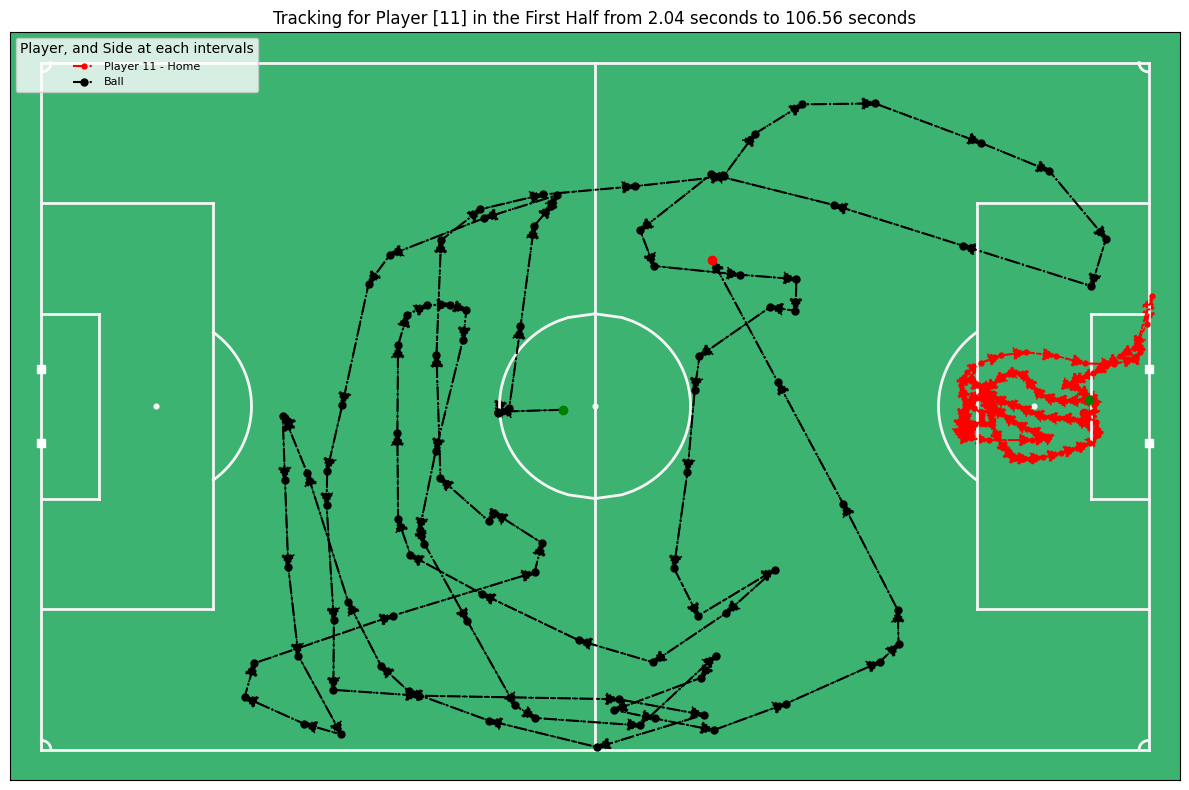

In [269]:
player_tracking(avg_1_sec.loc[:"Home-P_11-y"], plot_ball=True, sides=["Home"]*avg_1_sec.loc[:"Home-P_11-y"].shape[1])

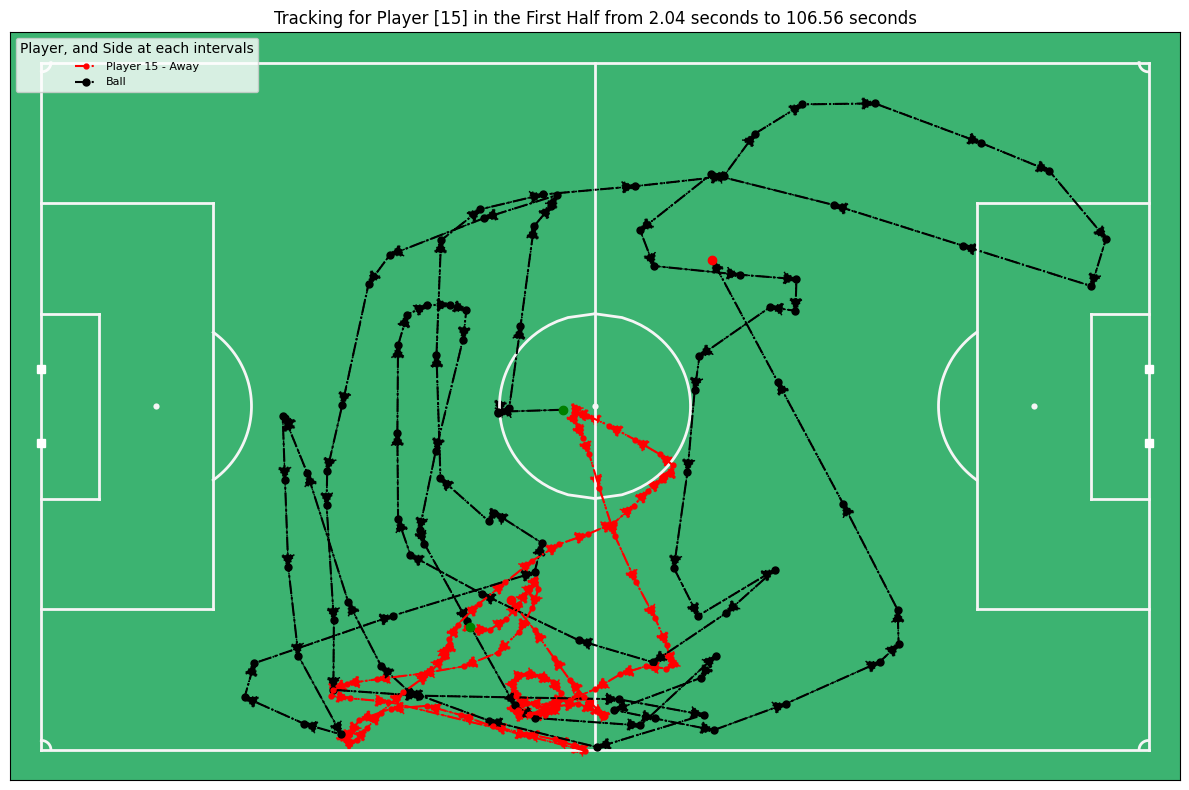

In [270]:
player_tracking(avg_1_sec, [15], sides=["Away"]*1)

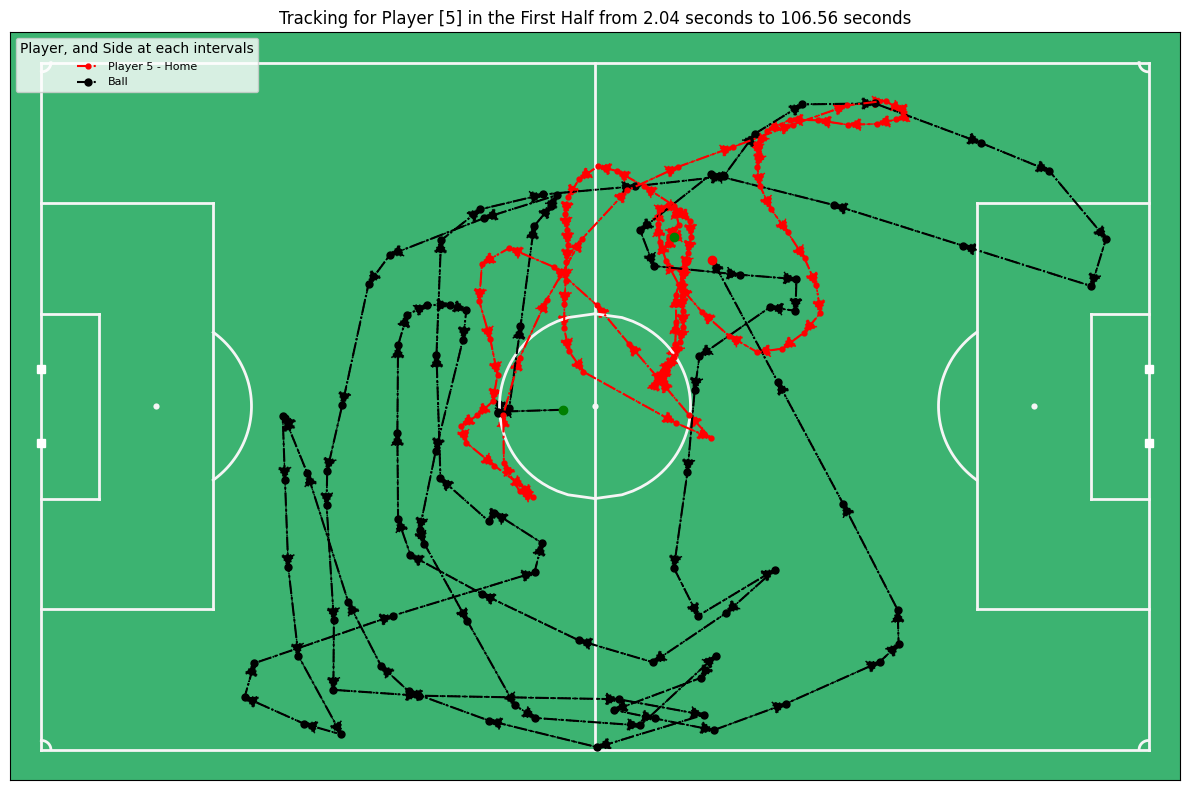

In [271]:
player_tracking(avg_1_sec, [5], sides=["Home"])

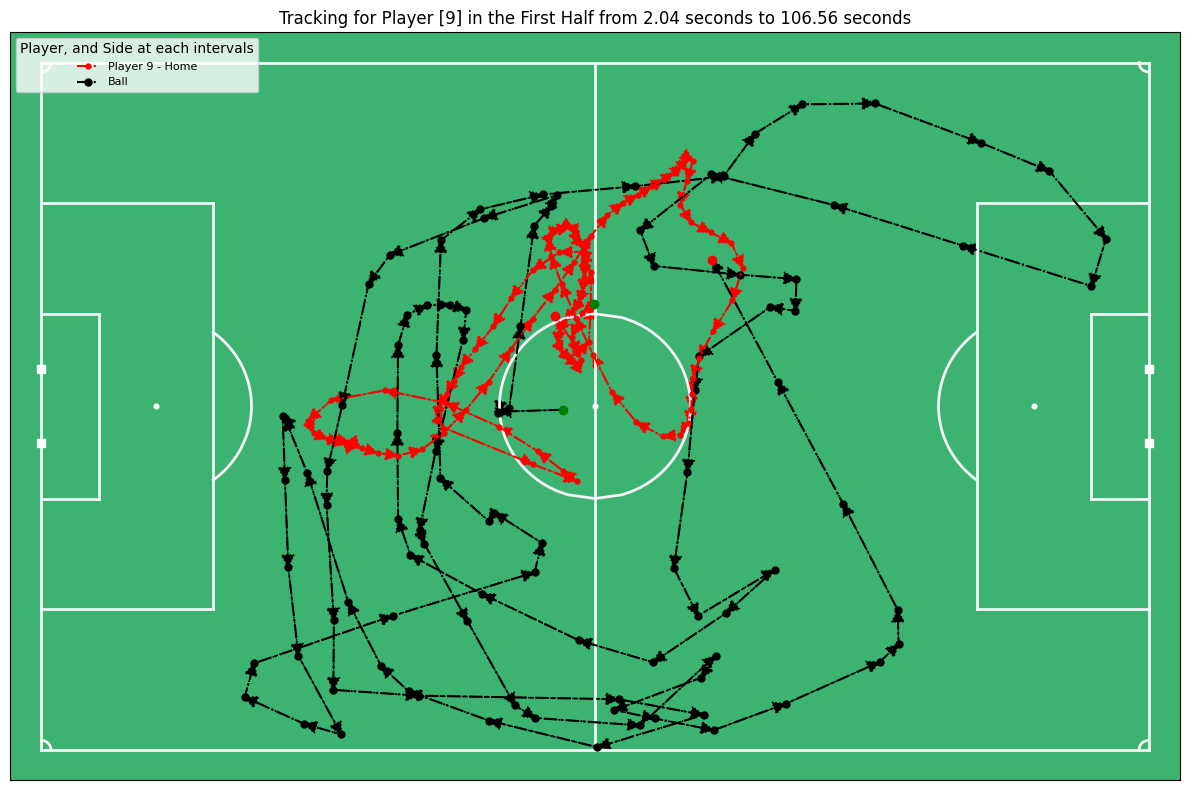

In [272]:
player_tracking(avg_1_sec, [9], sides=["Home"])

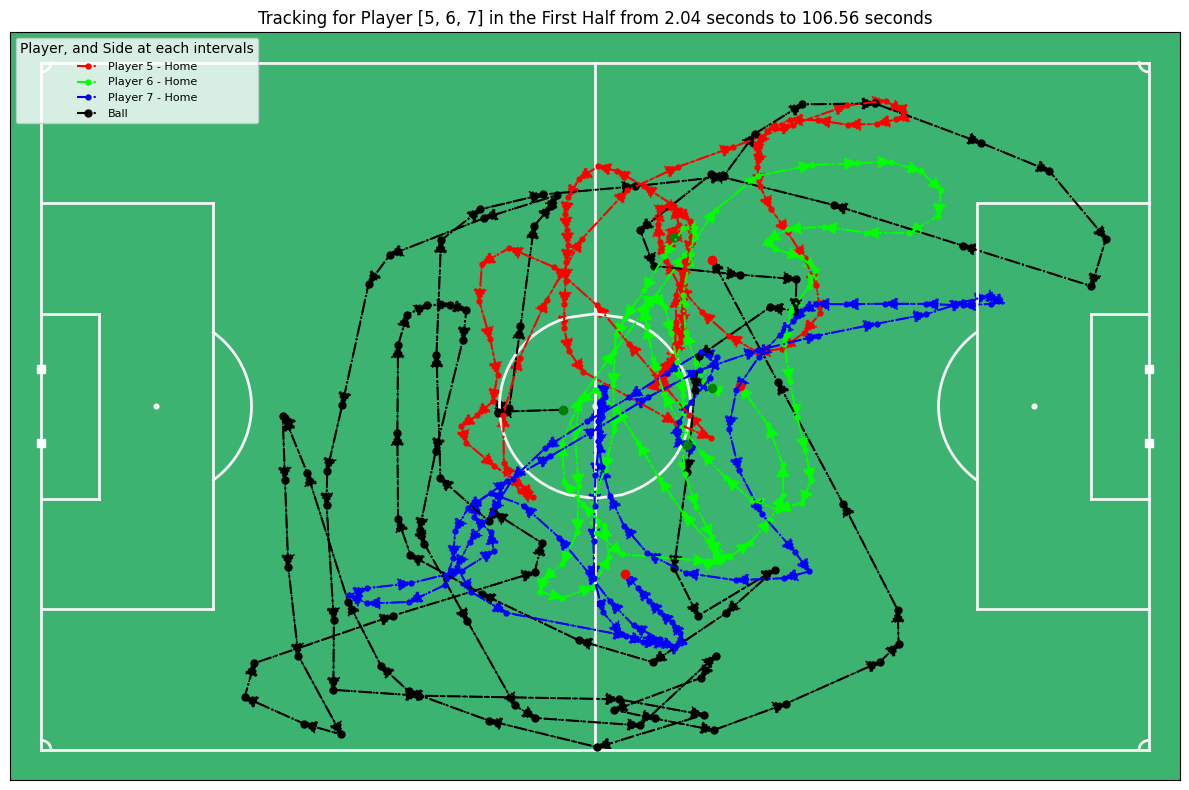

In [273]:
player_tracking(avg_1_sec, [5, 6, 7], sides=["Home"]*3)

In [276]:
# Calculate players speed
def players_speed():
    MPS_TO_MPH = 2.23694
    player_columns = [(f'P_{i}-x', f'P_{i}-y') for i in range(1, 12)]
    
    for i, (x_col, y_col) in enumerate(player_columns, 1):
        # Calculate Euclidean distance between consecutive points
        x_diff = avg_1_sec[x_col].diff()
        y_diff = avg_1_sec[y_col].diff()
        distance = np.sqrt(x_diff**2 + y_diff**2)
        
        # Calculate time difference between frames
        time_diff = avg_1_sec['Time[s]'].diff()
        
        # Calculate speed (distance / time)
        # Note: First row will be NaN as we can't calculate speed for a single point
        speed = distance / time_diff
        speed_mph = speed * MPS_TO_MPH
        
        avg_1_sec[f"P_{i}_speed"] = speed_mph

# players_speed()

In [277]:
avg_1_sec

,Period,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,Home-P_4-y,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1.0,2.04,0.649075,0.267862,0.677262,0.426183,0.676346,0.545278,0.643126,0.777459,...,0.434040,0.376211,0.495640,0.021007,0.502760,0.504104,0.497760,0.361457,0.470664,0.505236
2,1.0,3.04,0.650808,0.270631,0.675158,0.425478,0.665320,0.549432,0.641822,0.791985,...,0.439949,0.372589,0.504589,0.017182,0.511515,0.507609,0.511674,0.367192,0.412815,0.508063
3,1.0,4.04,0.651694,0.280151,0.676261,0.421896,0.657516,0.555598,0.646048,0.804760,...,0.454579,0.368341,0.529735,0.012959,0.534513,0.518531,0.539336,0.385298,0.412500,0.510373
4,1.0,5.04,0.661733,0.267924,0.682300,0.409777,0.656030,0.552604,0.655471,0.799333,...,0.478016,0.360982,0.564856,0.013846,0.566855,0.524310,0.559714,0.400973,0.422494,0.503116
5,1.0,6.04,0.673676,0.231273,0.684500,0.388219,0.654914,0.540658,0.663447,0.770978,...,0.498419,0.348076,0.586411,0.016337,0.599375,0.520330,0.571700,0.381762,0.432715,0.384008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,102.56,0.658622,0.284726,0.805326,0.608564,0.774550,0.845029,0.681718,0.970827,...,0.565900,0.780642,0.672336,0.517828,0.711294,0.585494,0.671791,0.777793,0.774205,0.846298
97,1.0,103.56,0.648138,0.244811,0.809757,0.576441,0.778034,0.808042,0.708046,0.954528,...,0.560564,0.740448,0.671885,0.465853,0.716718,0.575467,0.682035,0.747681,0.773309,0.796452
98,1.0,104.56,0.632405,0.199122,0.803184,0.536538,0.769485,0.778044,0.724953,0.924333,...,0.550803,0.696876,0.661737,0.407796,0.711587,0.544086,0.684256,0.714498,0.724107,0.642151
99,1.0,105.56,0.604444,0.153059,0.781466,0.494411,0.750401,0.752907,0.724504,0.878209,...,0.532556,0.649585,0.639057,0.332835,0.696557,0.499061,0.675850,0.683854,0.665083,0.464788


# Clustering players positions

In [39]:
def clustering_dataset() -> np.array:
    cm_1 = np.array([avg_1_sec["P_5-x"], avg_1_sec["P_5-y"]])
    cm_2 = np.array([avg_1_sec["P_6-x"], avg_1_sec["P_6-y"]])
    cm_3 = np.array([avg_1_sec["P_7-x"], avg_1_sec["P_7-y"]])

    X = np.concatenate([cm_1, cm_2, cm_3], axis=1).T
    label = np.array([np.full(len(avg_1_sec["P_5-x"]), 0), np.full(len(avg_1_sec["P_6-x"]), 1), np.full(len(avg_1_sec["P_7-x"]), 2)])
    label = label.reshape(-1, 1)
    label = label.flatten()
    
    return X, label

In [44]:
X, y_true = clustering_dataset()

KeyError: 'P_5-x'

In [ ]:
X.shape

In [ ]:
def clustering():
    kmeans = KMeans(n_clusters=3, random_state=0, init="random", n_init="auto").fit(X)
    kmeans_plus = KMeans(n_clusters=3, random_state=0, init="k-means++", n_init="auto").fit(X)
    b_kmeans = BisectingKMeans(n_clusters=3, random_state=0, init="random").fit(X)
    s_clustering = SpectralClustering(n_clusters=3).fit(X)
    single = AgglomerativeClustering(n_clusters=3, linkage="single").fit(X)
    complete = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(X)
    average = AgglomerativeClustering(n_clusters=3, linkage="average").fit(X)
    ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)

    return kmeans, kmeans_plus, b_kmeans, s_clustering, single, complete, average, ward

In [ ]:
def accuracy():
    result = []
    clusters = clustering()
    for clus in clusters:
        result.append(clus)
        y_pred = clus.fit_predict(X)        
        acc = accuracy_score(y_true, y_pred)

        print(f"{clus}: {np.round(acc, 2)}")

accuracy()

In [ ]:
color = ["orange", "blue", "green"]
for i in range(X.shape[0]):
    if i < X.shape[0] // 3:
        plt.scatter(X[i][0], X[i][1], color="orange")
    elif i < (X.shape[0] * 2) // 3 and i > X.shape[0] // 3:
        plt.scatter(X[i][0], X[i][1], color="blue")
    else:
        plt.scatter(X[i][0], X[i][1], color="green")
    plt.grid()
plt.show()

In [372]:
kmeans, kmeans_plus, b_kmeans, s_clustering, single_clu, complete_clu, average_clu, ward_clu = clustering()

NameError: name 'clustering' is not defined

In [ ]:
def plot_clusters():
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    ax[0, 0].scatter(X[:, 0], X[:, 1], s=15, c=kmeans.labels_)
    ax[0, 0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c="r", marker="*")
    ax[0, 0].set_title("KMeans")
    
    ax[0, 1].scatter(X[:, 0], X[:, 1], s=15, c=kmeans_plus.labels_)
    ax[0, 1].scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1], s=10, c="r", marker="*")
    ax[0, 1].set_title("KMeans++")
    
    ax[1, 0].scatter(X[:, 0], X[:, 1], s=15, c=b_kmeans.labels_)
    ax[1, 0].scatter(b_kmeans.cluster_centers_[:, 0], b_kmeans.cluster_centers_[:, 1], s=10, c="r", marker="*")
    ax[1, 0].set_title("BisectingKMeans")
    
    ax[1, 1].scatter(X[:, 0], X[:, 1], s=15, c=s_clustering.labels_)
    ax[1, 1].set_title("SpectralClustering")
    
    ax[2, 0].scatter(X[:, 0], X[:, 1], s=15, c=single_clu.labels_)
    ax[2, 0].set_title("Single Agglomerative Linkage")
    
    ax[2, 1].scatter(X[:, 0], X[:, 1], s=15, c=complete_clu.labels_)
    ax[2, 1].set_title("Complete Agglomerative Linkage")
    
    ax[3, 0].scatter(X[:, 0], X[:, 1], s=15, c=average_clu.labels_)
    ax[3, 0].set_title("Average Agglomerative Linkage")
    
    ax[3, 1].scatter(X[:, 0], X[:, 1], s=15, c=ward_clu.labels_)
    ax[3, 1].set_title("Ward Agglomerative Linkage")
    plt.show()
    
plot_clusters()

# Correlation Between Ball and Player

In [ ]:
ball_player = avg_1_sec.loc[:, "P_1-x":"ball-y"]

In [ ]:
ball_player

In [ ]:
x_ball_player = ball_player.loc[:, ball_player.columns.str.contains("x")]
y_ball_player = ball_player.loc[:, ball_player.columns.str.contains("y")]

x_ball_player.columns = (player_pos + [x_ball_player.columns[-1]])
y_ball_player.columns = (player_pos + [y_ball_player.columns[-1]])

In [ ]:
x_ball_player

In [ ]:
y_ball_player

#### X-coordinates correlation

In [ ]:
x_ball_player.corr()#.iloc[-1]

#### Y-coordinates correlation

In [ ]:
y_ball_player.corr()#.iloc[-1]

# Tracking players closest to the ball using frames

In [278]:
period_1_data

,Period,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,Home-P_4-y,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,0.77154,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,0.77197,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.49580,0.36160,0.50040,0.50384
53,1,2.12,0.64805,0.26978,0.67767,0.42637,0.68060,0.54582,0.64418,0.77242,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.49770,0.50397
54,1,2.16,0.64815,0.26943,0.67769,0.42634,0.68020,0.54562,0.64409,0.77287,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.49500,0.50410
55,1,2.20,0.64826,0.26908,0.67770,0.42630,0.67978,0.54545,0.64398,0.77334,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.49230,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56941,1,2277.64,0.62761,0.23085,0.64230,0.40400,0.64701,0.57348,0.65522,0.75079,...,0.52400,0.38176,0.59599,0.15547,0.60600,0.74054,0.61124,0.28576,0.06203,0.42215
56942,1,2277.68,0.62798,0.23092,0.64336,0.40412,0.64762,0.57316,0.65551,0.75048,...,0.52415,0.38200,0.59609,0.15545,0.60593,0.73984,0.61163,0.28605,0.06193,0.42138
56943,1,2277.72,0.62836,0.23102,0.64441,0.40427,0.64823,0.57281,0.65579,0.75016,...,0.52428,0.38227,0.59617,0.15548,0.60585,0.73912,0.61202,0.28637,0.06181,0.42066
56944,1,2277.76,0.62875,0.23123,0.64546,0.40446,0.64886,0.57245,0.65606,0.74983,...,0.52441,0.38258,0.59625,0.15554,0.60576,0.73846,0.61241,0.28659,0.06169,0.42000


In [279]:
ply_tra = period_1_data.loc[:1000, "Home-P_1-x":"ball-y"]
ply_tra

,Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,Home-P_4-y,Home-P_5-x,Home-P_5-y,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,0.77154,0.57283,0.25354,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,0.77197,0.57270,0.25348,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.49580,0.36160,0.50040,0.50384
53,0.64805,0.26978,0.67767,0.42637,0.68060,0.54582,0.64418,0.77242,0.57257,0.25351,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.49770,0.50397
54,0.64815,0.26943,0.67769,0.42634,0.68020,0.54562,0.64409,0.77287,0.57245,0.25345,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.49500,0.50410
55,0.64826,0.26908,0.67770,0.42630,0.67978,0.54545,0.64398,0.77334,0.57232,0.25338,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.49230,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.58268,0.29811,0.61293,0.67853,0.59248,0.79307,0.44577,0.91592,0.39659,0.51147,...,0.34748,0.56588,0.52038,0.17202,0.51278,0.83710,0.56520,0.73373,0.19216,0.92972
997,0.58243,0.29830,0.61220,0.67781,0.59208,0.79291,0.44483,0.91591,0.39588,0.51211,...,0.34711,0.56613,0.52003,0.17205,0.51250,0.83688,0.56448,0.73261,0.19007,0.92821
998,0.58216,0.29852,0.61147,0.67710,0.59164,0.79276,0.44390,0.91589,0.39517,0.51269,...,0.34671,0.56633,0.51967,0.17211,0.51221,0.83662,0.56376,0.73145,0.18792,0.92666
999,0.58189,0.29865,0.61072,0.67640,0.59116,0.79262,0.44300,0.91578,0.39445,0.51321,...,0.34630,0.56655,0.51930,0.17221,0.51190,0.83636,0.56305,0.73028,0.18572,0.92507


In [280]:
players, ball = ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], ply_tra.loc[:,"ball-x":"ball-y"]

In [281]:
players.head()

,Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,Home-P_4-y,Home-P_5-x,Home-P_5-y,...,Away-P_20-x,Away-P_20-y,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y
51,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,0.77154,0.57283,0.25354,...,0.40042,0.51021,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179
52,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,0.77197,0.57270,0.25348,...,0.40045,0.51021,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.49580,0.36160
53,0.64805,0.26978,0.67767,0.42637,0.68060,0.54582,0.64418,0.77242,0.57257,0.25351,...,0.40049,0.51020,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151
54,0.64815,0.26943,0.67769,0.42634,0.68020,0.54562,0.64409,0.77287,0.57245,0.25345,...,0.40054,0.51018,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131
55,0.64826,0.26908,0.67770,0.42630,0.67978,0.54545,0.64398,0.77334,0.57232,0.25338,...,0.40059,0.51010,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121


In [282]:
ball.head()

,ball-x,ball-y
51,0.50216,0.50376
52,0.50040,0.50384
53,0.49770,0.50397
54,0.49500,0.50410
55,0.49230,0.50422


In [283]:
result = pd.DataFrame(index=ply_tra.index)
result["Time[s]"] = period_1_data["Time[s]"]

for i in range(0, players.shape[1] - 1, 2):
    ply_x, ply_y = players.iloc[:, i], players.iloc[:, i + 1]
    eu_x = np.square(ply_x - ball["ball-x"])
    eu_y = np.square(ply_y - ball["ball-y"])
    distance = np.sqrt(eu_x + eu_y)
    result[f"{players.columns[i][:-2]}"] = distance

In [284]:
result

,Time[s],Home-P_1,Home-P_2,Home-P_3,Home-P_4,Home-P_5,Home-P_6,Home-P_7,Home-P_8,Home-P_9,...,Away-P_15,Away-P_16,Away-P_17,Away-P_18,Away-P_19,Away-P_20,Away-P_21,Away-P_22,Away-P_23,Away-P_24
51,2.04,0.275191,0.191807,0.184230,0.303195,0.260008,0.106888,0.098654,0.284414,0.150812,...,0.337720,0.203416,0.204798,0.238774,0.410884,0.101944,0.143985,0.481352,0.000000,0.142119
52,2.08,0.276468,0.193472,0.185470,0.304295,0.260591,0.108682,0.099907,0.284570,0.151233,...,0.337110,0.201720,0.203449,0.238035,0.410777,0.100153,0.143261,0.481379,0.001745,0.142314
53,2.12,0.278299,0.195987,0.187627,0.305813,0.261411,0.111383,0.101924,0.284831,0.151749,...,0.336165,0.199131,0.201267,0.236808,0.410660,0.097409,0.142170,0.481557,0.004401,0.142472
54,2.16,0.280223,0.198550,0.189797,0.307352,0.262343,0.114103,0.103974,0.285070,0.152239,...,0.335219,0.196536,0.199054,0.235575,0.410510,0.094655,0.141125,0.481750,0.007047,0.142793
55,2.20,0.282160,0.201109,0.191960,0.308921,0.263294,0.116815,0.106052,0.285337,0.152771,...,0.334270,0.193946,0.196844,0.234355,0.410418,0.091898,0.140118,0.482048,0.009673,0.143059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,39.84,0.742588,0.490045,0.423000,0.253985,0.465537,0.318535,0.176525,0.106239,0.384526,...,0.108232,0.051512,0.433519,0.623080,0.187478,0.209338,0.395606,0.825735,0.333730,0.421392
997,39.88,0.742114,0.490809,0.424168,0.255057,0.464217,0.318533,0.175973,0.108728,0.383472,...,0.110850,0.049247,0.432240,0.621804,0.188378,0.208379,0.394669,0.825016,0.335115,0.422424
998,39.92,0.741610,0.491604,0.425346,0.256206,0.462951,0.318607,0.175461,0.111320,0.382446,...,0.113537,0.046960,0.430991,0.620486,0.189398,0.207377,0.393766,0.824260,0.336558,0.423512
999,39.96,0.741183,0.492404,0.426526,0.257448,0.461732,0.318740,0.175032,0.113971,0.381411,...,0.116272,0.044567,0.429691,0.619322,0.190510,0.206425,0.392839,0.823452,0.338028,0.424642


In [285]:
idx = result.min(axis=1).round(4)
closest_to_ball = result.idxmin(axis=1)
print("\n".join(f"{i} - {ply} - {dis}" for i, ply, dis in zip(result.index, closest_to_ball, idx)))

51 - Away-P_23 - 0.0
52 - Away-P_23 - 0.0017
53 - Away-P_23 - 0.0044
54 - Away-P_23 - 0.007
55 - Away-P_23 - 0.0097
56 - Away-P_23 - 0.0123
57 - Away-P_23 - 0.0149
58 - Away-P_23 - 0.0177
59 - Away-P_23 - 0.0205
60 - Away-P_23 - 0.0233
61 - Away-P_23 - 0.0261
62 - Away-P_23 - 0.0289
63 - Away-P_23 - 0.0317
64 - Away-P_23 - 0.0345
65 - Away-P_23 - 0.0374
66 - Away-P_23 - 0.0402
67 - Away-P_23 - 0.0431
68 - Away-P_23 - 0.0459
69 - Away-P_23 - 0.0488
70 - Away-P_20 - 0.0498
71 - Away-P_20 - 0.047
72 - Away-P_20 - 0.0442
73 - Away-P_20 - 0.0413
74 - Away-P_20 - 0.0385
75 - Away-P_20 - 0.0357
76 - Away-P_20 - 0.0329
77 - Away-P_20 - 0.03
78 - Away-P_20 - 0.0272
79 - Away-P_20 - 0.0244
80 - Away-P_20 - 0.0216
81 - Away-P_20 - 0.0187
82 - Away-P_20 - 0.0159
83 - Away-P_20 - 0.0131
84 - Away-P_20 - 0.0102
85 - Away-P_20 - 0.0074
86 - Away-P_20 - 0.0045
87 - Away-P_20 - 0.0017
88 - Away-P_20 - 0.0002
89 - Away-P_20 - 0.0002
90 - Away-P_20 - 0.0002
91 - Away-P_20 - 0.0002
92 - Away-P_20 - 0.0002

In [286]:
min_dist_to_ball = pd.DataFrame(index=ply_tra.index)
min_dist_to_ball["Time[s]"] = period_1_data["Time[s]"]

for i, c in zip(min_dist_to_ball.index, closest_to_ball):
    min_dist_to_ball.loc[i, "Home-P_0-x"] = period_1_data.loc[i, f"{c}-x"]
    min_dist_to_ball.loc[i, "Home-P_0-y"] = period_1_data.loc[i, f"{c}-y"]
    
    min_dist_to_ball.loc[i, f"{c}-x"] = period_1_data.loc[i, f"{c}-x"]
    min_dist_to_ball.loc[i, f"{c}-y"] = period_1_data.loc[i, f"{c}-y"]
    
min_dist_to_ball["ball-x"] = period_1_data["ball-x"]
min_dist_to_ball["ball-y"] = period_1_data["ball-y"]

min_dist_to_ball

,Time[s],Home-P_0-x,Home-P_0-y,Away-P_23-x,Away-P_23-y,Away-P_20-x,Away-P_20-y,Home-P_9-x,Home-P_9-y,Away-P_21-x,...,Away-P_19-x,Away-P_19-y,Home-P_4-x,Home-P_4-y,Home-P_3-x,Home-P_3-y,Home-P_10-x,Home-P_10-y,ball-x,ball-y
51,2.04,0.50216,0.50376,0.50216,0.50376,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50216,0.50376
52,2.08,0.50214,0.50371,0.50214,0.50371,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50040,0.50384
53,2.12,0.50209,0.50366,0.50209,0.50366,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49770,0.50397
54,2.16,0.50203,0.50361,0.50203,0.50361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49500,0.50410
55,2.20,0.50195,0.50356,0.50195,0.50356,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49230,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,39.84,0.23524,0.92331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23524,0.92331,0.19216,0.92972
997,39.88,0.23401,0.92251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23401,0.92251,0.19007,0.92821
998,39.92,0.23275,0.92170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23275,0.92170,0.18792,0.92666
999,39.96,0.15779,0.89034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18572,0.92507


In [287]:
temp = closest_to_ball.values.tolist()

sides = []
player_col = []
for i in range(len(temp)):
    end = 8
    if len(temp[i]) == 9:
        end = 9
    player_col.append(temp[i][7:end])
    sides.append(temp[i][:4])

In [293]:
def get_changes(lst: list[str]):
    change_nums = [lst[0]]
    change_indices = [0]
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:
            change_nums.append(lst[i])
            change_indices.append(i)
            
    return change_nums, change_indices

def get_items(lst: list[int], lst2: list[str]):
    items = []
    for i in lst:
        items.append(lst2[i])

    return items

In [295]:
dif_player_col, idxs = get_changes(player_col)
dif_sides = get_items(idxs, sides)
dif_min_dist_to_ball = min_dist_to_ball.iloc[idxs, :]

In [296]:
dif_min_dist_to_ball

,Time[s],Home-P_0-x,Home-P_0-y,Away-P_23-x,Away-P_23-y,Away-P_20-x,Away-P_20-y,Home-P_9-x,Home-P_9-y,Away-P_21-x,...,Away-P_19-x,Away-P_19-y,Home-P_4-x,Home-P_4-y,Home-P_3-x,Home-P_3-y,Home-P_10-x,Home-P_10-y,ball-x,ball-y
51,2.04,0.50216,0.50376,0.50216,0.50376,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50216,0.50376
70,2.80,0.40201,0.50862,NaN,NaN,0.40201,0.50862,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45179,0.50612
157,6.28,0.49321,0.41665,NaN,NaN,NaN,NaN,0.49321,0.41665,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43001,0.42561
166,6.64,0.50071,0.34622,NaN,NaN,NaN,NaN,NaN,NaN,0.50071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43407,0.36321
175,7.00,0.43483,0.23050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43813,0.30080
264,10.56,0.46700,0.27568,NaN,NaN,NaN,NaN,0.46700,0.27568,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39553,0.22891
266,10.64,0.31733,0.28240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38679,0.23421
333,13.32,0.26796,0.57447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27677,0.45649
411,16.44,0.27668,0.90301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26338,0.79439
454,18.16,0.28866,0.92318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27552,0.91953


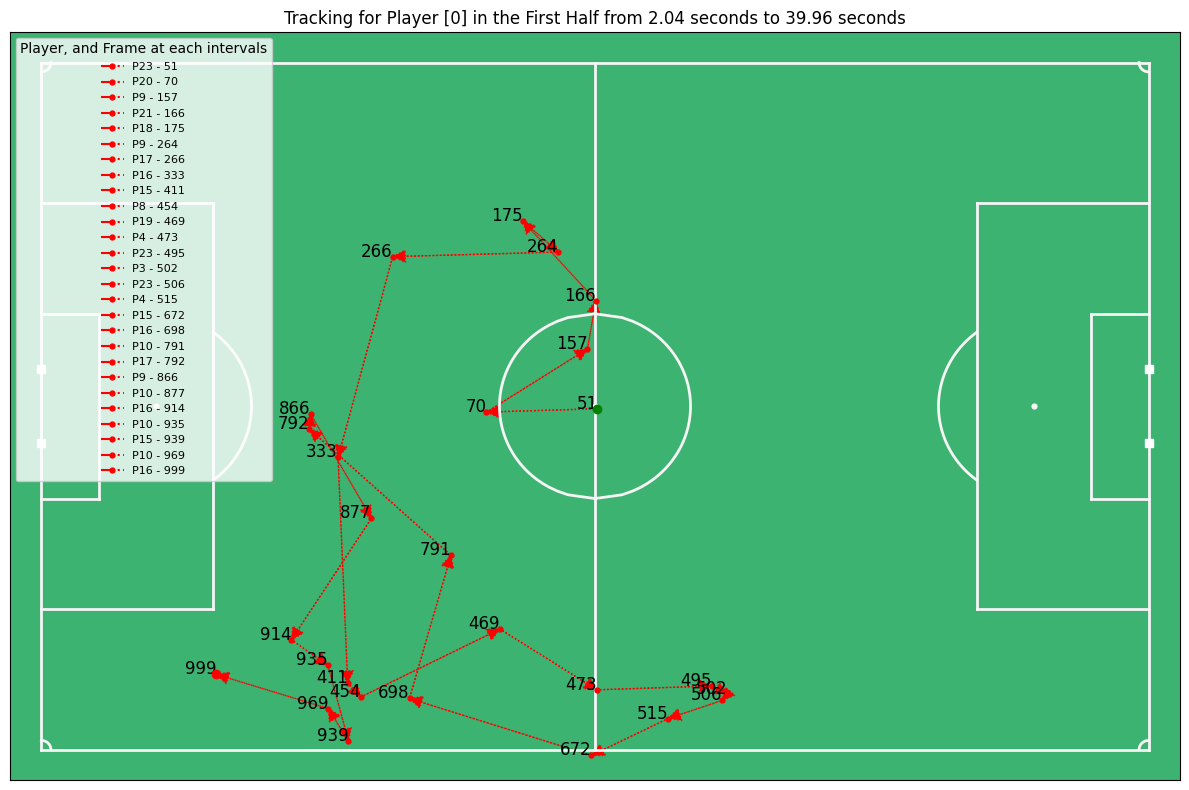

In [316]:
player_tracking(dif_min_dist_to_ball, plot_ball=False, players=[0], use_annotation=dif_player_col, sides=["Home"]) # Putting down [0] and ["Home"] because we don't want it to be different color and it's easier

# Events that can happen during a match: Link ([Event dataset details link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf))
- BALL LOST ['CLEARANCE', 'CROSS-INTERCEPTION', 'FORCED', 'FORCED-END HALF', 'GOAL KICK-INTERCEPTION', 'HEAD', 'HEAD-INTERCEPTION', 'INTERCEPTION', 'OFFSIDE', 'THEFT']

- BALL OUT ['CLEARANCE', 'HEAD']

- CARD ['YELLOW']

- CHALLENGE ['AERIAL-FAULT-LOST', 'AERIAL-FAULT-WON', 'AERIAL-LOST', 'AERIAL-WON', 'FAULT-WON', 'GROUND', 'GROUND-ADVANTAGE-LOST', 'GROUND-ADVANTAGE-WON', 'GROUND-FAULT-LOST', 'GROUND-FAULT-WON', 'GROUND-LOST', 'GROUND-WON', 'TACKLE-ADVANTAGE-WON', 'TACKLE-FAULT-LOST', 'TACKLE-FAULT-WON', 'TACKLE-LOST', 'TACKLE-WON']

- PASS ['CROSS', 'DEEP BALL', 'GOAL KICK', 'HEAD']

- RECOVERY ['BLOCKED', 'INTERCEPTION', 'SAVED', 'THEFT']

- SET PIECE ['CORNER KICK', 'FREE KICK', 'KICK OFF', 'THROW IN']

- SHOT ['BLOCKED', 'HEAD-OFF TARGET-OUT', 'OFF TARGET-HEAD-OUT', 'OFF TARGET-OUT', 'ON TARGET-GOAL', 'ON TARGET-SAVED']


In [299]:
df_event = pd.read_csv("Sample_Game_2_RawEventsData.csv")
df_event

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [319]:
df_event_period_1 = df_event[df_event["Period"] == 1]
df_sub_type = df_event_period_1[["Type", "Subtype"]]
df_sub_type_group = df_sub_type.groupby(df_sub_type["Type"])
df_sub_type_group_lst = df_sub_type_group.agg(lambda x: list(pd.unique(x))).reset_index()
print(df_sub_type_group_lst.to_markdown(index=True))

|    | Type           | Subtype                                                                                                                                                                                                                                                                                                            |
|---:|:---------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | BALL LOST      | ['INTERCEPTION', 'HEAD-INTERCEPTION', 'HEAD', nan, 'THEFT', 'GOAL KICK-INTERCEPTION', 'OFFSIDE', 'CLEARANCE', 'CROSS-INTERCEPTION', 'FORCED', 'FORCED-END HALF']                                                                                                                                                   |
|

In [304]:
df_sub_type_count = df_sub_type.groupby(["Type", "Subtype"]).size().reset_index(name="Count")
df_sub_type_count

,Type,Subtype,Count
0,BALL LOST,CLEARANCE,1
1,BALL LOST,CROSS-INTERCEPTION,3
2,BALL LOST,FORCED,1
3,BALL LOST,FORCED-END HALF,1
4,BALL LOST,GOAL KICK-INTERCEPTION,2
5,BALL LOST,HEAD,6
6,BALL LOST,HEAD-INTERCEPTION,7
7,BALL LOST,INTERCEPTION,63
8,BALL LOST,OFFSIDE,1
9,BALL LOST,THEFT,24


In [305]:
a = df_sub_type_count[df_sub_type_count["Type"] == "BALL LOST"]
b = df_sub_type_count[df_sub_type_count["Type"] == "BALL OUT"]
c = df_sub_type_count[df_sub_type_count["Type"] == "CARD"]
d = df_sub_type_count[df_sub_type_count["Type"] == "CHALLENGE"]
e = df_sub_type_count[df_sub_type_count["Type"] == "FAULT RECEIVED"]
f = df_sub_type_count[df_sub_type_count["Type"] == "PASS"]
g = df_sub_type_count[df_sub_type_count["Type"] == "RECOVERY"]
h = df_sub_type_count[df_sub_type_count["Type"] == "SET PIECE"]
i = df_sub_type_count[df_sub_type_count["Type"] == "SHOT"]

In [306]:
a

,Type,Subtype,Count
0,BALL LOST,CLEARANCE,1
1,BALL LOST,CROSS-INTERCEPTION,3
2,BALL LOST,FORCED,1
3,BALL LOST,FORCED-END HALF,1
4,BALL LOST,GOAL KICK-INTERCEPTION,2
5,BALL LOST,HEAD,6
6,BALL LOST,HEAD-INTERCEPTION,7
7,BALL LOST,INTERCEPTION,63
8,BALL LOST,OFFSIDE,1
9,BALL LOST,THEFT,24


In [307]:
b

,Type,Subtype,Count
10,BALL OUT,CLEARANCE,1
11,BALL OUT,HEAD,3


In [308]:
c

,Type,Subtype,Count
12,CARD,YELLOW,1


In [309]:
d

,Type,Subtype,Count
13,CHALLENGE,AERIAL-FAULT-LOST,2
14,CHALLENGE,AERIAL-FAULT-WON,1
15,CHALLENGE,AERIAL-LOST,14
16,CHALLENGE,AERIAL-WON,19
17,CHALLENGE,FAULT-WON,1
18,CHALLENGE,GROUND,3
19,CHALLENGE,GROUND-ADVANTAGE-LOST,3
20,CHALLENGE,GROUND-ADVANTAGE-WON,1
21,CHALLENGE,GROUND-FAULT-LOST,6
22,CHALLENGE,GROUND-FAULT-WON,3


In [310]:
e #Fault received

,Type,Subtype,Count


In [311]:
f

,Type,Subtype,Count
30,PASS,CROSS,2
31,PASS,DEEP BALL,1
32,PASS,GOAL KICK,5
33,PASS,HEAD,16


In [312]:
g

,Type,Subtype,Count
34,RECOVERY,BLOCKED,1
35,RECOVERY,INTERCEPTION,88
36,RECOVERY,SAVED,3
37,RECOVERY,THEFT,17


In [313]:
h

,Type,Subtype,Count
38,SET PIECE,CORNER KICK,3
39,SET PIECE,FREE KICK,12
40,SET PIECE,KICK OFF,3
41,SET PIECE,THROW IN,17


In [314]:
i

,Type,Subtype,Count
42,SHOT,BLOCKED,1
43,SHOT,HEAD-OFF TARGET-OUT,2
44,SHOT,OFF TARGET-HEAD-OUT,1
45,SHOT,OFF TARGET-OUT,2
46,SHOT,ON TARGET-GOAL,2
47,SHOT,ON TARGET-SAVED,3


In [315]:
df_sub_type_group.count()

,Subtype
Type,
BALL LOST,109
BALL OUT,4
CARD,1
CHALLENGE,144
FAULT RECEIVED,0
PASS,24
RECOVERY,109
SET PIECE,35
SHOT,11
